# Simulaciones

In [3]:
import csestimator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rie_estimator
import scipy as sp
import seaborn as sns
from matplotlib.pyplot import figure

## Función para generar dinámicamente una matriz en bloques (diagonales son cero)

In [4]:
def make_corr_matrix(groups: list, corrs: list)->np.ndarray:
    mat_holder = np.zeros(shape=(sum(groups), sum(groups)))
    for index,group in enumerate(groups):
        if index == 0:
            myrange = list(range(0, group))
            index_i = 0
            index_j = 0
            for index_i in myrange:
                for index_j in myrange:
                    mat_holder[index_i, index_j] = corrs[index]
        else:
            myrange = list(range(sum(groups[:index]), sum(groups[:index+1])))
            for index_i in myrange:
                for index_j in myrange:
                    mat_holder[index_i, index_j] = corrs[index]
    np.fill_diagonal(mat_holder, 1.0)
    return mat_holder

### ejemplos

In [4]:
make_corr_matrix([4,2,2], [0.2, 0.3,0.4])

array([[1. , 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. ],
       [0.2, 1. , 0.2, 0.2, 0. , 0. , 0. , 0. ],
       [0.2, 0.2, 1. , 0.2, 0. , 0. , 0. , 0. ],
       [0.2, 0.2, 0.2, 1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0.3, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.3, 1. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0.4],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.4, 1. ]])

In [5]:
make_corr_matrix([5, 2, 3], [0.1, 0.3, 0.7])

array([[1. , 0.1, 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0.1, 1. , 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0.1, 1. , 0.1, 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0.1, 0.1, 1. , 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0.1, 0.1, 0.1, 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. , 0.3, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.3, 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0.7, 0.7],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.7, 1. , 0.7],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.7, 0.7, 1. ]])

## Simulando retornos a través de cholensky

In [6]:
corr_matrix = make_corr_matrix([70, 50, 20, 35, 25, 40, 50, 50 , 20, 40, 50, 30, 20], [0.3, 0.5, 0.8, 0.2, 0.3, 0.2, 0.7, 0.5, 0.3, 0.4, 0.3, 0.3, 0.5])
number_of_assets = corr_matrix.shape[0]
number_of_obs = 800
# En caso de que la matriz sea distinta de cero 
#means = np.zeros(number_of_assets)
Means = np.full((number_of_obs, number_of_assets), 0)

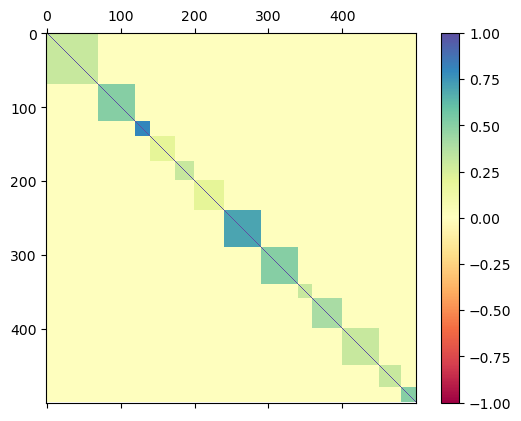

In [7]:
fig, axs = plt.subplots(1,1)
#fig.set_size_inches(18.5, 10.5)
caxs = axs.matshow(corr_matrix, vmin=-1, vmax=1, cmap = cm.Spectral)
fig.colorbar(caxs)

In [8]:
Z = np.random.normal(size = number_of_assets * number_of_obs)
Z.shape

(400000,)

In [31]:
Z = Z.reshape((number_of_assets,number_of_obs))
Z.shape

(500, 800)

In [32]:
L = np.linalg.cholesky(corr_matrix)
L.shape

(500, 500)

In [10]:
daily_returns =  Means.T + np.inner(L, np.transpose(Z))

In [11]:
sample_corr = np.corrcoef(daily_returns)

In [12]:
rie_corr = rie_estimator.get_rie(returns=daily_returns.T, normalize=False, max_ones= False)

In [13]:
daily_returns.min()

-4.923115972522943

In [14]:
daily_returns.mean()

0.006236151373710868

In [15]:
daily_returns.max()

4.294852896720483

<AxesSubplot:ylabel='Density'>

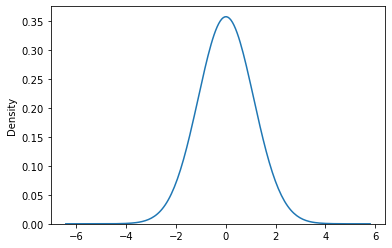

In [16]:
sns.kdeplot(daily_returns.flatten(), bw_method=0.5, fill=False, alpha = 1)

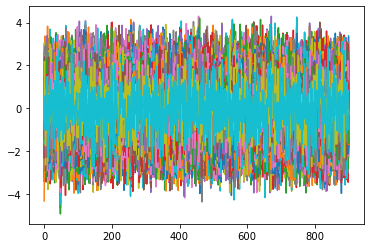

In [17]:
plt.plot(daily_returns.T);

In [18]:
daily_returns.shape

(800, 900)

Mostrando el estimador de correlación muestral

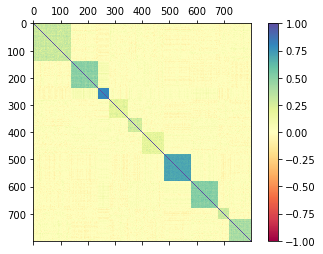

In [19]:
fig, axs = plt.subplots(1,1)
#fig.set_size_inches(18.5, 10.5)
caxs = axs.matshow(sample_corr, vmin=-1, vmax=1, cmap = cm.Spectral)
fig.colorbar(caxs)

Mostrando el estimador de correlación del RIE:

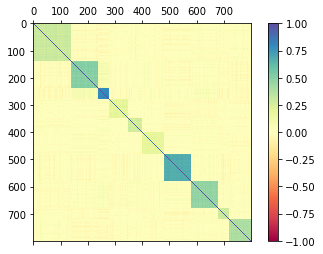

In [20]:
fig, axs = plt.subplots(1,1)
#fig.set_size_inches(18.5, 10.5)
caxs = axs.matshow(rie_corr, vmin=-1, vmax=1, cmap = cm.Spectral)
fig.colorbar(caxs)

In [21]:
print(np.linalg.norm(((corr_matrix - sample_corr)), ord = "fro"))
print(np.linalg.norm(((corr_matrix- rie_corr)), ord = "fro"))

26.03520352205545
22.313673525610174


## Simulando retornos con una normal mutlivariada

In [13]:
corr_matrix = make_corr_matrix([70, 50, 20, 35, 25, 40, 50, 50 , 20, 40, 50, 30, 20], [0.3, 0.5, 0.8, 0.2, 0.3, 0.2, 0.7, 0.5, 0.3, 0.4, 0.3, 0.3, 0.5])
#corr_matrix = make_corr_matrix([140, 100, 40, 70, 50, 80, 100, 100 , 40, 80], [0.3, 0.5, 0.8, 0.2, 0.3, 0.2, 0.7, 0.5, 0.3, 0.4])

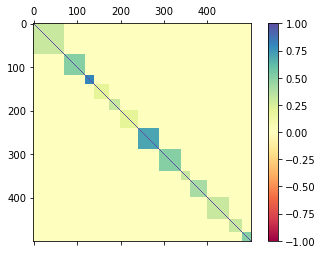

In [14]:
fig, axs = plt.subplots(1,1)
#fig.set_size_inches(18.5, 10.5)
caxs = axs.matshow(corr_matrix, vmin=-1, vmax=1, cmap = cm.Spectral)
fig.colorbar(caxs)

In [15]:
daily_returns = np.random.multivariate_normal(mean = np.zeros(corr_matrix.shape[0]), cov = corr_matrix, size=800)

In [16]:
daily_returns.shape

(800, 500)

In [17]:
est_corr = np.corrcoef(daily_returns.T)

In [18]:
rie_corr = rie_estimator.get_rie(returns=pd.DataFrame(daily_returns), normalize=True, max_ones= False)

In [20]:
eca_corr = csestimator.get_shrinkage_est(X_matrix = daily_returns, alpha = 0.5)

<AxesSubplot:ylabel='Density'>

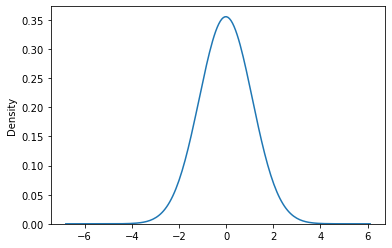

In [28]:
sns.kdeplot(daily_returns.flatten(), bw_method=0.5, fill=False, alpha = 1)

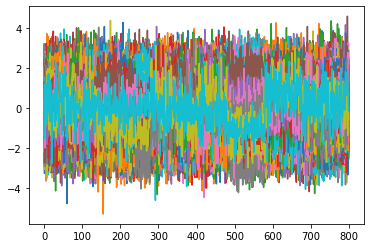

In [29]:
plt.plot(daily_returns.T);

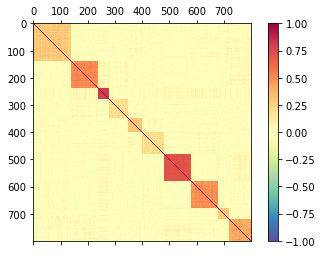

In [30]:
fig, axs = plt.subplots(1,1)
#fig.set_size_inches(18.5, 10.5)
caxs = axs.matshow(est_corr, vmin=-1, vmax=1, cmap = cm.Spectral_r)
fig.colorbar(caxs)

# cambiar colores de los heatmaps

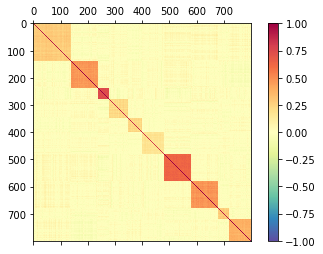

In [29]:
fig, axs = plt.subplots(1,1)
#fig.set_size_inches(18.5, 10.5)
caxs = axs.matshow(rie_corr, vmin=-1, vmax=1, cmap = cm.Spectral_r)
fig.colorbar(caxs)

# cambiar colores de los heatmaps

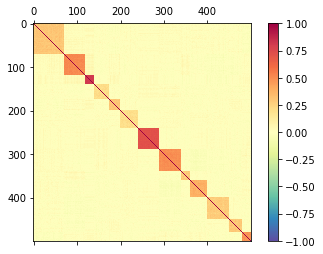

In [33]:
fig, axs = plt.subplots(1,1)
#fig.set_size_inches(18.5, 10.5)
caxs = axs.matshow(eca_corr, vmin=-1, vmax=1, cmap = cm.Spectral_r)
fig.colorbar(caxs)

# cambiar colores de los heatmaps

In [30]:
print(np.linalg.norm(((corr_matrix - est_corr)), ord = "fro"))
print(np.linalg.norm(((corr_matrix- rie_corr)), ord = "fro"))

28.759808196307283
24.620270494914955


In [10]:
eigen_true = np.linalg.eigvalsh(corr_matrix)
eigen_sample = np.linalg.eigvalsh(est_corr)
eigen_rie = np.linalg.eigvalsh(rie_corr)
eigen_true.sort()
eigen_sample.sort()
eigen_rie.sort()


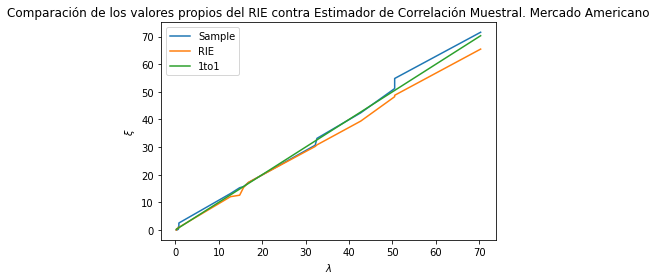

In [32]:
fig, ax = plt.subplots(1,1)
ax.plot(eigen_true,eigen_sample)
ax.plot(eigen_true,eigen_rie)
ax.plot(eigen_true,eigen_true)
#ax = sns.lineplot(x = eigen_true, y = eigen_sample)
#ax = sns.lineplot(x = eigen_true, y = eigen_rie)
plt.title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado Americano")
plt.legend(labels=['Sample', 'RIE', "1to1"])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()


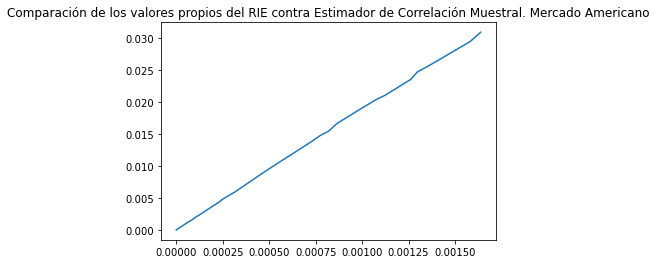

In [33]:
ax = sns.lineplot(x = eigen_sample[:30], y = eigen_rie[:30])
plt.title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado Americano")
plt.show()


## Simulación con $q \approx 1$ y con estandarización

In [4]:
len([70, 50, 20, 35, 25, 40, 50, 50 , 20, 40, 50, 30, 20])

13

In [44]:
corr_matrix =  make_corr_matrix([70, 50, 20, 35, 25, 40, 50, 50 , 20, 40, 50, 30, 20], [0.3, 0.5, 0.8, 0.2, 0.3, 0.2, 0.7, 0.5, 0.3, 0.4, 0.3, 0.3, 0.5])
num_obs = 600
num_simul = 100

In [68]:
eigen_true = np.linalg.eigvalsh(corr_matrix).round(5)
eigen_true.sort()

In [46]:
def returnsStandardization(returns):
    returns_wth_mean = returns - np.mean(returns, axis=0)
    hat_sigma = np.sqrt((returns_wth_mean**2).sum(axis=1))
    r_tilde = returns_wth_mean.divide(hat_sigma, axis=0)
    X = r_tilde / np.std(r_tilde)
    return X

In [47]:
frob_muestral = []
frob_rie = []
frob_eca = []
vals_propios_muestral = []
vals_propios_rie = []
vals_propios_eca = []
for simul in range(num_simul):
    # Generación de retornos
    daily_returns = np.random.multivariate_normal(mean = np.zeros(corr_matrix.shape[0]), cov = corr_matrix, size=num_obs)
    # Estandarización de los retornos
    daily_returns_df = pd.DataFrame(daily_returns)
    daily_returns_df = returnsStandardization(daily_returns_df)
    # Estimador de correlación muestral
    est_corr = np.corrcoef(daily_returns_df.values.T)
    # Estimador RIE
    rie_corr = rie_estimator.get_rie(returns=daily_returns_df, normalize=False, max_ones= False)
    # Estimado ECA
    eca_corr = csestimator.get_shrinkage_est(X_matrix = daily_returns_df, alpha = 0.5)
    # Calcular distancias frobenius
    frob_muestral.append(np.linalg.norm(((corr_matrix - est_corr)), ord = "fro"))
    frob_rie.append(np.linalg.norm(((corr_matrix - rie_corr)), ord = "fro"))
    frob_eca.append(np.linalg.norm(((corr_matrix - eca_corr)), ord = "fro"))
    # Sacar valores propios
    eigen_sample = np.linalg.eigvalsh(est_corr)
    eigen_rie = np.linalg.eigvalsh(rie_corr)
    eigen_eca = np.linalg.eigvalsh(eca_corr)
    eigen_sample.sort()
    eigen_rie.sort()
    eigen_eca.sort()
    vals_propios_muestral.append(eigen_sample)
    vals_propios_rie.append(eigen_rie)
    vals_propios_eca.append(eigen_eca)

In [48]:
print(np.mean(frob_muestral))
print(np.mean(frob_rie))
print(np.mean(frob_eca))
print(np.mean(frob_muestral) - np.mean(frob_rie))
print(np.mean(frob_muestral) - np.mean(frob_eca))
print(np.std(frob_muestral))
print(np.std(frob_rie))
print(np.std(frob_eca))

20.068003604578937
16.92282829872069
11.21296141015372
3.1451753058582455
8.855042194425216
0.2846896110420601
1.1582574122512932
0.30658626518834087


In [49]:
vals_propios_muestral = np.array(vals_propios_muestral)
vals_propios_rie = np.array(vals_propios_rie)
vals_propios_eca = np.array(vals_propios_eca)
vals_propios_muestral.shape

(100, 500)

In [50]:
means_vals_propios_muestral = vals_propios_muestral.mean(axis = 0)
means_vals_propios_rie = vals_propios_rie.mean(axis = 0)
means_vals_propios_eca = vals_propios_eca.mean(axis = 0)
means_vals_propios_muestral.sort()
means_vals_propios_rie.sort()
means_vals_propios_eca.sort()

In [51]:
data2 = [means_vals_propios_muestral[eigen_true.round(2) == 0.2], means_vals_propios_eca[eigen_true.round(2) == 0.2], means_vals_propios_rie[eigen_true.round(2) == 0.2]]
data3 = [means_vals_propios_muestral[eigen_true.round(2) == 0.3], means_vals_propios_eca[eigen_true.round(2) == 0.3], means_vals_propios_rie[eigen_true.round(2) == 0.3]]
data5 = [means_vals_propios_muestral[eigen_true.round(2) == 0.5], means_vals_propios_eca[eigen_true.round(2) == 0.5], means_vals_propios_rie[eigen_true.round(2) == 0.5]]
data6 = [means_vals_propios_muestral[eigen_true.round(2) == 0.6], means_vals_propios_eca[eigen_true.round(2) == 0.6], means_vals_propios_rie[eigen_true.round(2) == 0.6]]
data7 = [means_vals_propios_muestral[eigen_true.round(2) == 0.7], means_vals_propios_eca[eigen_true.round(2) == 0.7], means_vals_propios_rie[eigen_true.round(2) == 0.7]]
data8 = [means_vals_propios_muestral[eigen_true.round(2) == 0.8], means_vals_propios_eca[eigen_true.round(2) == 0.8], means_vals_propios_rie[eigen_true.round(2) == 0.8]]

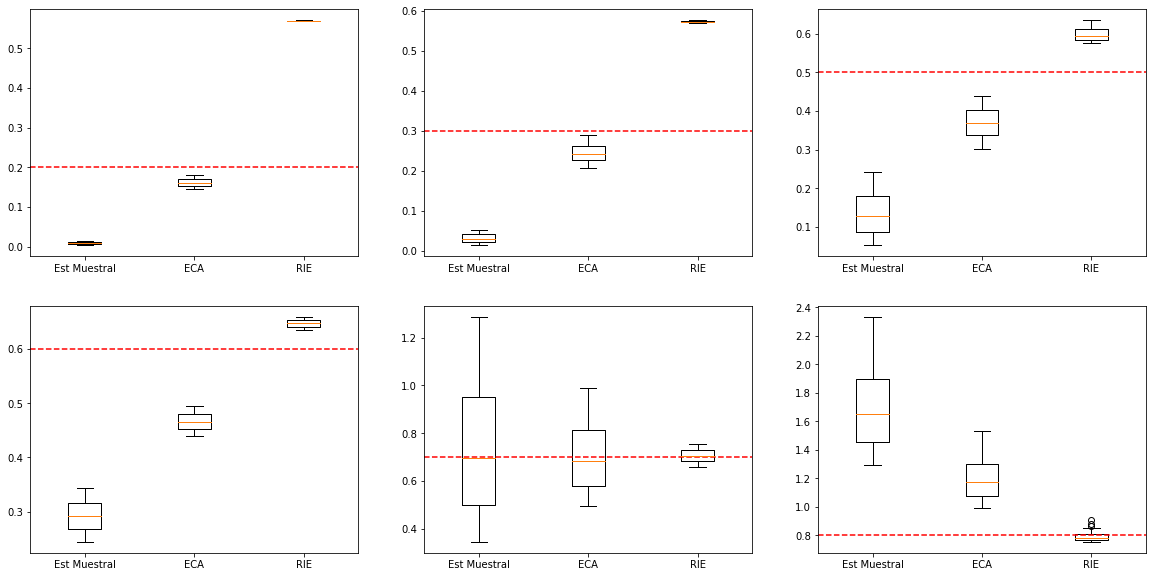

In [52]:
fig7, ax7 = plt.subplots(2,3, figsize=(20,10))
ax7[0,0].boxplot(data2, labels=["Est Muestral", "ECA", "RIE"])
ax7[0,0].axhline(y=0.2, color='r', linestyle='--')
ax7[0,1].boxplot(data3, labels=["Est Muestral", "ECA", "RIE"])
ax7[0,1].axhline(y=0.3, color='r', linestyle='--')
ax7[0,2].boxplot(data5, labels=["Est Muestral", "ECA", "RIE"])
ax7[0,2].axhline(y=0.5, color='r', linestyle='--')
ax7[1,0].boxplot(data6, labels=["Est Muestral", "ECA", "RIE"])
ax7[1,0].axhline(y=0.6, color='r', linestyle='--')
ax7[1,1].boxplot(data7, labels=["Est Muestral", "ECA", "RIE"])
ax7[1,1].axhline(y=0.7, color='r', linestyle='--')
ax7[1,2].boxplot(data8, labels=["Est Muestral", "ECA", "RIE"])
ax7[1,2].axhline(y=0.8, color='r', linestyle='--')

plt.show()

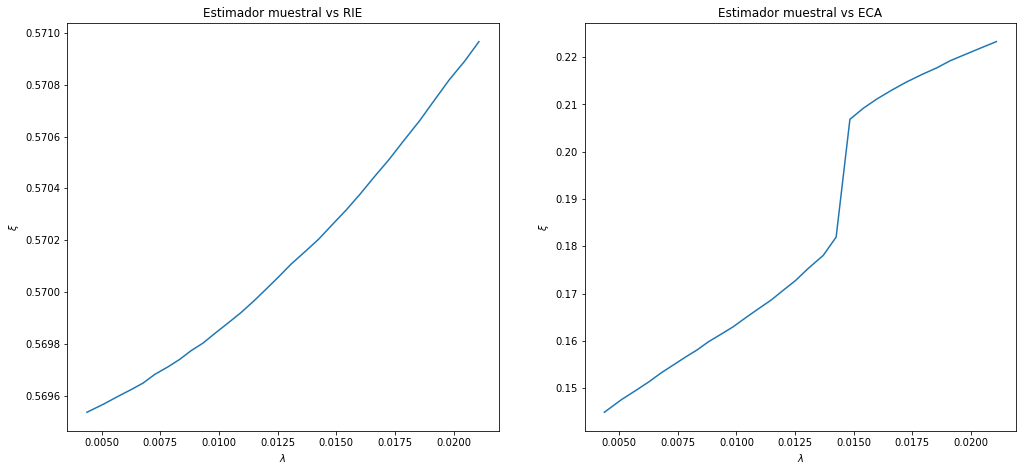

In [53]:
#plt.title(r"Comparación de los valores propios del RIE contra Estimador de Correlación Muestral con $q = 1$ y estandarización")
fig, ax = plt.subplots(1,2, figsize=(17,7.5))
ax[0].plot(means_vals_propios_muestral[:30],means_vals_propios_rie[:30])
ax[1].plot(means_vals_propios_muestral[:30],means_vals_propios_eca[:30])
ax[0].set(ylabel=r'$\xi$')
ax[0].set(xlabel=r'$\lambda$')
ax[0].set_title("Estimador muestral vs RIE")
ax[1].set_title("Estimador muestral vs ECA")
ax[1].set(ylabel=r'$\xi$')
ax[1].set(xlabel=r'$\lambda$')
plt.show()

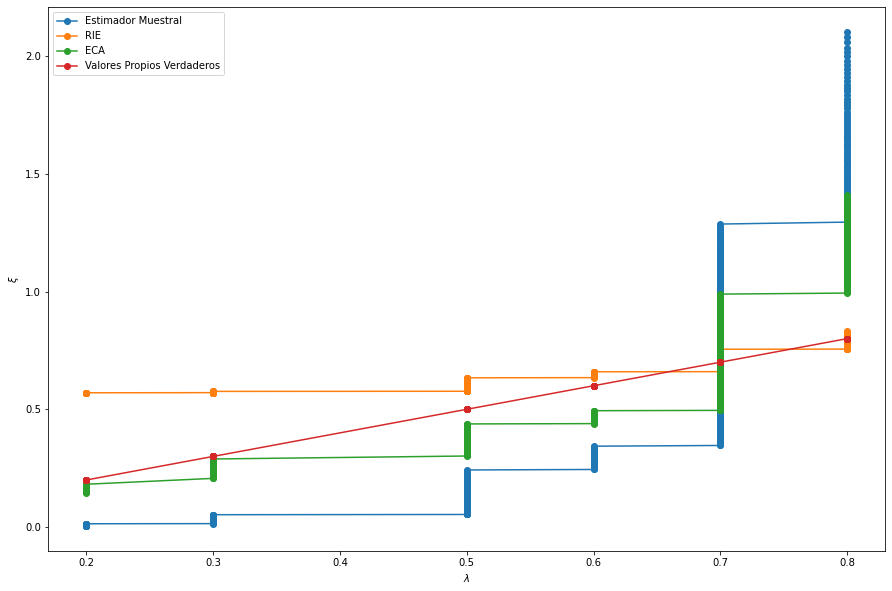

In [54]:
#plt.title("Comparación de los primeros 480 valores propios verdaderos vs valores propios RIE y valores propios muestrales (con estandarización")
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot( eigen_true[:480], means_vals_propios_muestral[:480], marker = 'o')
ax.plot( eigen_true[:480], means_vals_propios_rie[:480],marker = 'o')
ax.plot( eigen_true[:480], means_vals_propios_eca[:480], marker = 'o')
ax.plot(eigen_true[:480], eigen_true[:480], marker = 'o')
plt.legend(labels=['Estimador Muestral', 'RIE', 'ECA','Valores Propios Verdaderos'])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()

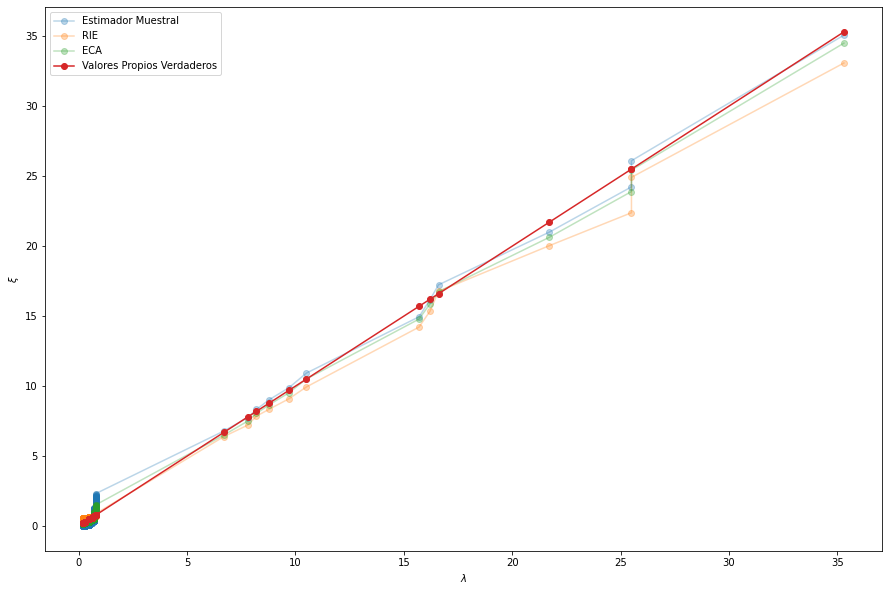

In [56]:
#plt.title("Comparación de todos valores propios verdaderos vs valores propios RIE y valores propios muestrales (con estandarización)")
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot( eigen_true, means_vals_propios_muestral, marker = 'o', alpha = 0.3)
ax.plot( eigen_true, means_vals_propios_rie, marker = 'o', alpha = 0.3)
ax.plot( eigen_true, means_vals_propios_eca, marker = 'o', alpha = 0.3)
ax.plot(eigen_true, eigen_true, marker = 'o')
plt.legend(labels=['Estimador Muestral', 'RIE', 'ECA','Valores Propios Verdaderos'])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()

## Simulación con q = 1/2 y con estandarización

In [5]:
corr_matrix =  make_corr_matrix([70, 50, 20, 35, 25, 40, 50, 50 , 20, 40, 50, 30, 20], [0.3, 0.5, 0.8, 0.2, 0.3, 0.2, 0.7, 0.5, 0.3, 0.4, 0.3, 0.3, 0.5])
num_obs = 1000
num_simul = 100

In [12]:
eigen_true = np.linalg.eigvalsh(corr_matrix).round(5)
eigen_true.sort()

In [17]:
np.unique(eigen_true)[1]

0.3

In [7]:
values, counts = np.unique(eigen_true, return_counts=True)

In [90]:
pd.DataFrame([values.T, counts.T])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.2,0.3,0.5,0.6,0.7,0.8,6.7,7.8,8.2,8.8,9.7,10.5,15.7,16.2,16.6,21.7,25.5,35.3
1,19.0,49.0,117.0,39.0,190.0,73.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0


In [79]:
def returnsStandardization(returns):
    returns_wth_mean = returns - np.mean(returns, axis=0)
    hat_sigma = np.sqrt((returns_wth_mean**2).sum(axis=1))
    r_tilde = returns_wth_mean.divide(hat_sigma, axis=0)
    X = r_tilde / np.std(r_tilde)
    return X

In [82]:
frob_muestral = []
frob_rie = []
frob_eca_5 = []
frob_eca_2 = []
frob_eca_8 = []
vals_propios_muestral = []
vals_propios_rie = []
vals_propios_eca_2 = []
vals_propios_eca_5 = []
vals_propios_eca_8 = []
for simul in range(num_simul):
    # Generación de retornos
    daily_returns = np.random.multivariate_normal(mean = np.zeros(corr_matrix.shape[0]), cov = corr_matrix, size=num_obs)
    # Estandarización de los retornos
    daily_returns_df = pd.DataFrame(daily_returns)
    daily_returns_df = returnsStandardization(daily_returns_df)
    # Estimador de correlación muestral
    est_corr = np.corrcoef(daily_returns_df.values.T)
    # Estimador RIE
    rie_corr = rie_estimator.get_rie(returns=daily_returns_df, normalize=False, max_ones= True)
    # Estimado ECA
    eca_corr_5 = csestimator.get_shrinkage_est(X_matrix = daily_returns_df, alpha = 0.5)
    eca_corr_2 = csestimator.get_shrinkage_est(X_matrix = daily_returns_df, alpha = 0.2)
    eca_corr_8 = csestimator.get_shrinkage_est(X_matrix = daily_returns_df, alpha = 0.8)
    # Calcular distancias frobenius
    frob_muestral.append(np.linalg.norm(((corr_matrix - est_corr)), ord = "fro"))
    frob_rie.append(np.linalg.norm(((corr_matrix - rie_corr)), ord = "fro"))
    frob_eca_5.append(np.linalg.norm(((corr_matrix - eca_corr_5)), ord = "fro"))
    frob_eca_2.append(np.linalg.norm(((corr_matrix - eca_corr_2)), ord = "fro"))
    frob_eca_8.append(np.linalg.norm(((corr_matrix - eca_corr_8)), ord = "fro"))
    # Sacar valores propios
    eigen_sample = np.linalg.eigvalsh(est_corr)
    eigen_rie = np.linalg.eigvalsh(rie_corr)
    eigen_eca_2 = np.linalg.eigvalsh(eca_corr_2)
    eigen_eca_5 = np.linalg.eigvalsh(eca_corr_5)
    eigen_eca_8 = np.linalg.eigvalsh(eca_corr_8)
    eigen_sample.sort()
    eigen_rie.sort()
    eigen_eca_2.sort()
    eigen_eca_5.sort()
    eigen_eca_8.sort()
    vals_propios_muestral.append(eigen_sample)
    vals_propios_rie.append(eigen_rie)
    vals_propios_eca_2.append(eigen_eca_2)
    vals_propios_eca_5.append(eigen_eca_5)
    vals_propios_eca_8.append(eigen_eca_8)

Calcular la media y la desviación estándar de las distancias de frobenius entre los diversos estimadores y la matriz de correlación verdadera

In [83]:
print(np.mean(frob_muestral))
print(np.mean(frob_rie))
print(np.mean(frob_eca_2))
print(np.mean(frob_eca_5))
print(np.mean(frob_eca_8))

print(np.std(frob_muestral))
print(np.std(frob_rie))
print(np.std(frob_eca_2))
print(np.std(frob_eca_5))
print(np.std(frob_eca_8))

15.629813036113392
13.086754935574115
12.856259551838088
8.84889698078134
5.3980961716879445
0.22546228685819192
0.516981204724836
0.22865101656763087
0.2553560911366533
0.333742658350842


In [39]:
print(np.max(frob_muestral))
print(np.min(frob_muestral))
print(np.max(frob_rie))
print(np.min(frob_rie))
print(np.max(frob_eca_2))
print(np.min(frob_eca_2))
print(np.max(frob_eca_5))
print(np.min(frob_eca_5))
print(np.max(frob_eca_8))
print(np.min(frob_eca_8))

16.198266452130085
15.03234975276959
19.296114492213512
12.48082805869007
13.437416545879445
12.272104554436229
9.486129476548333
8.250630041914304
6.163727688205563
4.684237532852531


Text(0.5, 1.0, 'lookback = 90')

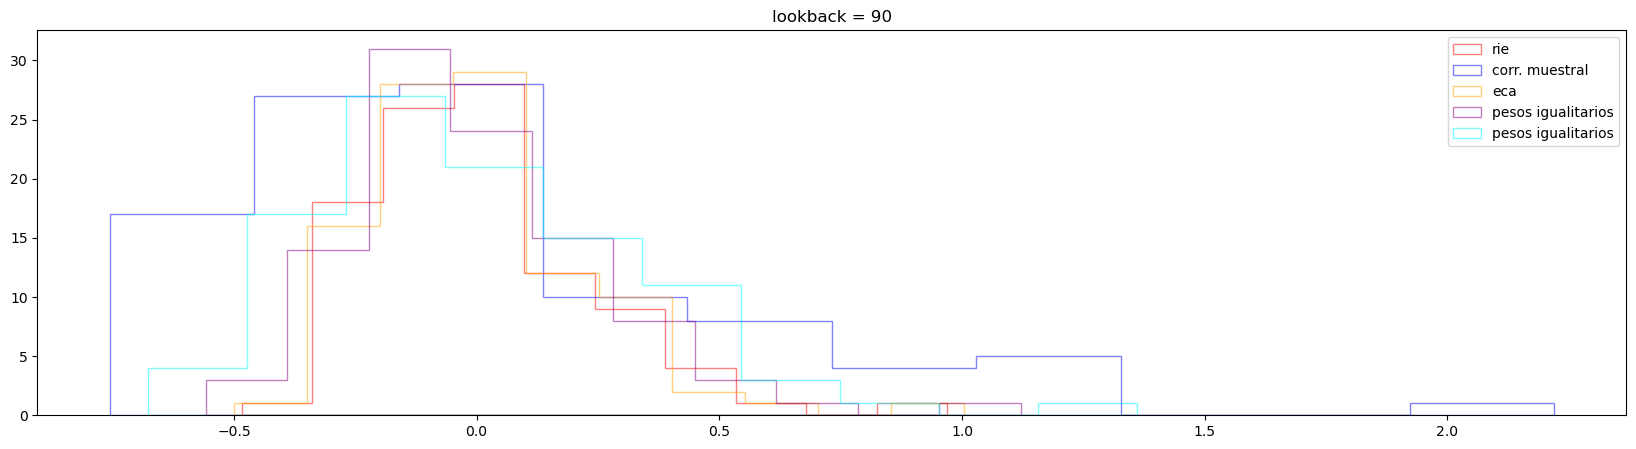

In [85]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(20.5, 5)
ax.hist(frob_muestral -np.mean(frob_muestral), alpha=0.5, label='rie', fill=False, edgecolor='red', histtype='stepfilled')
ax.hist(frob_rie- np.mean(frob_rie), alpha=0.5, label='corr. muestral', fill=False, edgecolor='blue', histtype='stepfilled')
ax.hist(frob_eca_2 -np.mean(frob_eca_2), alpha=0.5, label='eca', fill=False, edgecolor='orange', histtype='stepfilled')
ax.hist(frob_eca_5 - np.mean(frob_eca_5), alpha=0.5, label='pesos igualitarios', fill=False, edgecolor='purple', histtype='stepfilled')
ax.hist(frob_eca_8 - np.mean(frob_eca_8), alpha=0.5, label='pesos igualitarios', fill=False, edgecolor='aqua', histtype='stepfilled')
ax.legend(loc='upper right')
ax.set_title('lookback = 90')

Se obtienen los valores propios de las 100 simulaciones para cada una de las simulaciones y para cada uno de los estimadores

In [86]:
vals_propios_muestral = np.array(vals_propios_muestral)
vals_propios_rie = np.array(vals_propios_rie)
vals_propios_eca_2 = np.array(vals_propios_eca_2)
vals_propios_eca_5 = np.array(vals_propios_eca_5)
vals_propios_eca_8 = np.array(vals_propios_eca_8)

Se sacan los promedios de los valores propios estimados

In [87]:
means_vals_propios_muestral = vals_propios_muestral.mean(axis = 0)
means_vals_propios_rie = vals_propios_rie.mean(axis = 0)
means_vals_propios_eca_2 = vals_propios_eca_2.mean(axis = 0)
means_vals_propios_eca_5 = vals_propios_eca_5.mean(axis = 0)
means_vals_propios_eca_8 = vals_propios_eca_8.mean(axis = 0)
means_vals_propios_muestral.sort()
means_vals_propios_rie.sort()
means_vals_propios_eca_2.sort()
means_vals_propios_eca_5.sort()
means_vals_propios_eca_8.sort()

In [88]:
data2 = [means_vals_propios_muestral[eigen_true.round(2) == 0.2], means_vals_propios_eca_2[eigen_true.round(2) == 0.2], means_vals_propios_eca_5[eigen_true.round(2) == 0.2], means_vals_propios_eca_8[eigen_true.round(2) == 0.2], means_vals_propios_rie[eigen_true.round(2) == 0.2]]
data3 = [means_vals_propios_muestral[eigen_true.round(2) == 0.3], means_vals_propios_eca_2[eigen_true.round(2) == 0.3], means_vals_propios_eca_5[eigen_true.round(2) == 0.3], means_vals_propios_eca_8[eigen_true.round(2) == 0.3], means_vals_propios_rie[eigen_true.round(2) == 0.3]]
data5 = [means_vals_propios_muestral[eigen_true.round(2) == 0.5], means_vals_propios_eca_2[eigen_true.round(2) == 0.5], means_vals_propios_eca_5[eigen_true.round(2) == 0.5], means_vals_propios_eca_8[eigen_true.round(2) == 0.5], means_vals_propios_rie[eigen_true.round(2) == 0.5]]
data6 = [means_vals_propios_muestral[eigen_true.round(2) == 0.6], means_vals_propios_eca_2[eigen_true.round(2) == 0.6], means_vals_propios_eca_5[eigen_true.round(2) == 0.6], means_vals_propios_eca_8[eigen_true.round(2) == 0.6], means_vals_propios_rie[eigen_true.round(2) == 0.6]]
data7 = [means_vals_propios_muestral[eigen_true.round(2) == 0.7], means_vals_propios_eca_2[eigen_true.round(2) == 0.7], means_vals_propios_eca_5[eigen_true.round(2) == 0.7], means_vals_propios_eca_8[eigen_true.round(2) == 0.7], means_vals_propios_rie[eigen_true.round(2) == 0.7]]
data8 = [means_vals_propios_muestral[eigen_true.round(2) == 0.8], means_vals_propios_eca_2[eigen_true.round(2) == 0.8], means_vals_propios_eca_5[eigen_true.round(2) == 0.8], means_vals_propios_eca_8[eigen_true.round(2) == 0.8], means_vals_propios_rie[eigen_true.round(2) == 0.8]]

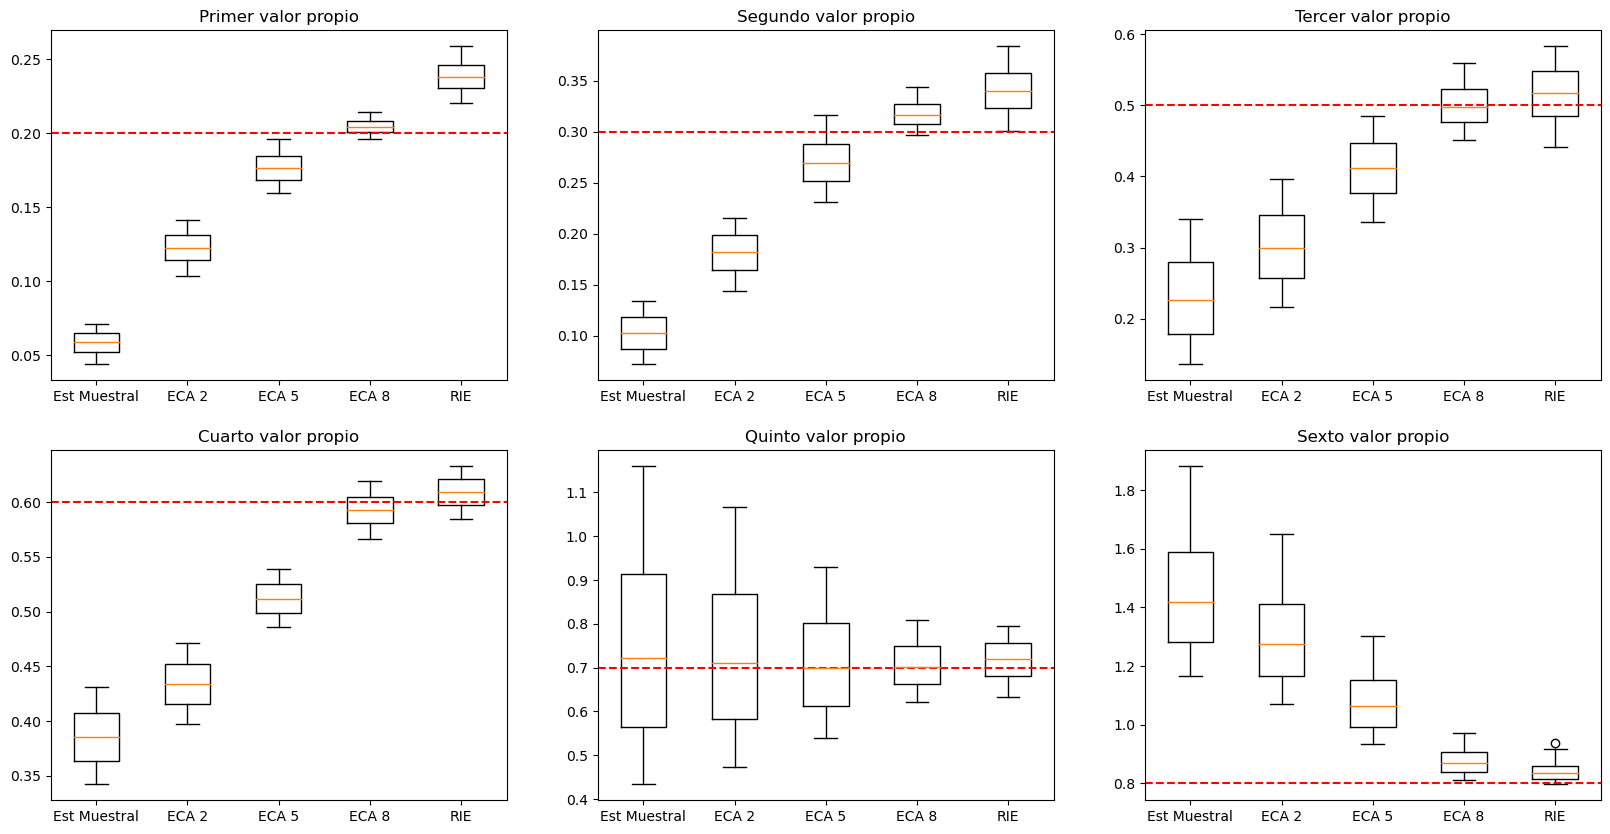

In [100]:
fig7, ax7 = plt.subplots(2,3, figsize=(20,10))
ax7[0,0].boxplot(data2, labels=["Est Muestral", "ECA 2","ECA 5","ECA 8", "RIE"])
ax7[0,0].axhline(y=0.2, color='r', linestyle='--')
ax7[0,0].set_title('Primer valor propio')
ax7[0,1].boxplot(data3, labels=["Est Muestral", "ECA 2","ECA 5","ECA 8", "RIE"])
ax7[0,1].axhline(y=0.3, color='r', linestyle='--')
ax7[0,1].set_title('Segundo valor propio')
ax7[0,2].boxplot(data5, labels=["Est Muestral", "ECA 2","ECA 5","ECA 8", "RIE"])
ax7[0,2].axhline(y=0.5, color='r', linestyle='--')
ax7[0,2].set_title('Tercer valor propio')
ax7[1,0].boxplot(data6, labels=["Est Muestral", "ECA 2","ECA 5","ECA 8", "RIE"])
ax7[1,0].axhline(y=0.6, color='r', linestyle='--')
ax7[1,0].set_title('Cuarto valor propio')
ax7[1,1].boxplot(data7, labels=["Est Muestral", "ECA 2","ECA 5","ECA 8", "RIE"])
ax7[1,1].axhline(y=0.7, color='r', linestyle='--')
ax7[1,1].set_title('Quinto valor propio')
ax7[1,2].boxplot(data8, labels=["Est Muestral", "ECA 2","ECA 5","ECA 8", "RIE"])
ax7[1,2].axhline(y=0.8, color='r', linestyle='--')
ax7[1,2].set_title('Sexto valor propio')

plt.show()

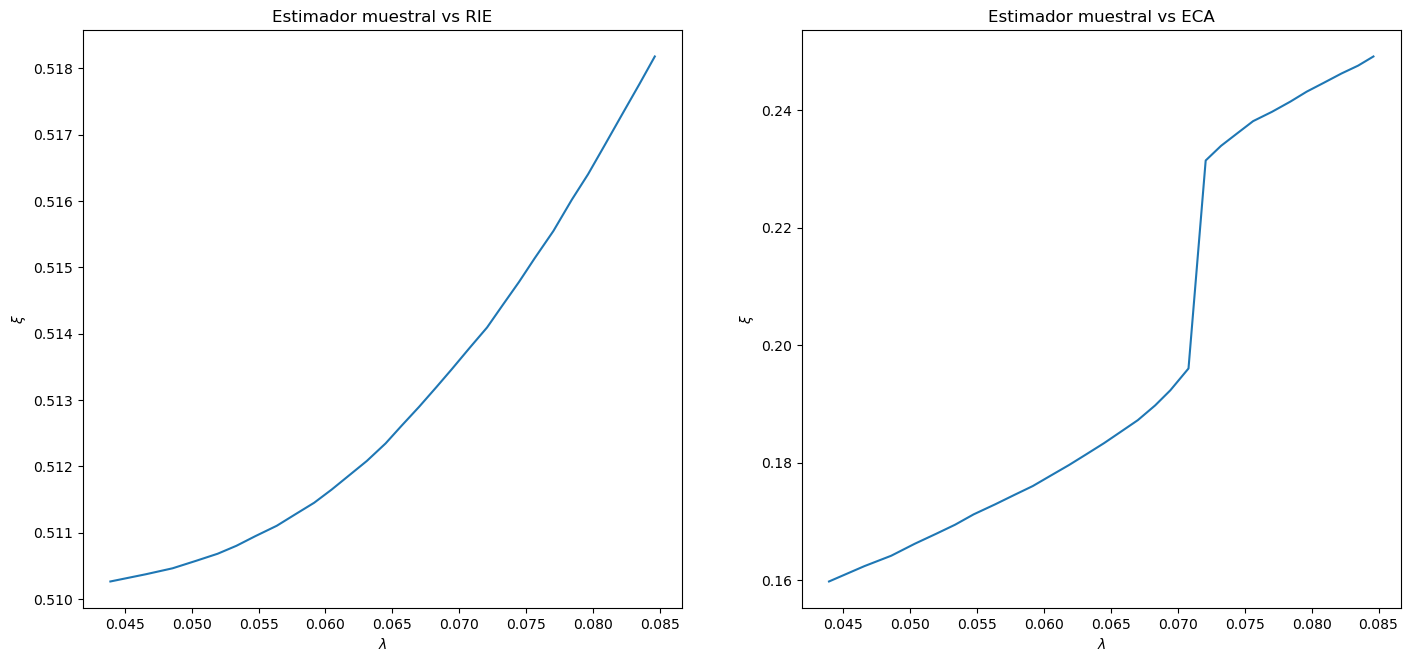

In [55]:
#plt.title(r"Comparación de los valores propios del RIE contra Estimador de Correlación Muestral con $q = 1/2$ y estandarización")
fig, ax = plt.subplots(1,2, figsize=(17,7.5))
ax[0].plot(means_vals_propios_muestral[:30],means_vals_propios_rie[:30])
ax[1].plot(means_vals_propios_muestral[:30],means_vals_propios_eca_5[:30])
ax[0].set(ylabel=r'$\xi$')
ax[0].set(xlabel=r'$\lambda$')
ax[0].set_title("Estimador muestral vs RIE")
ax[1].set_title("Estimador muestral vs ECA")
ax[1].set(ylabel=r'$\xi$')
ax[1].set(xlabel=r'$\lambda$')
plt.show()

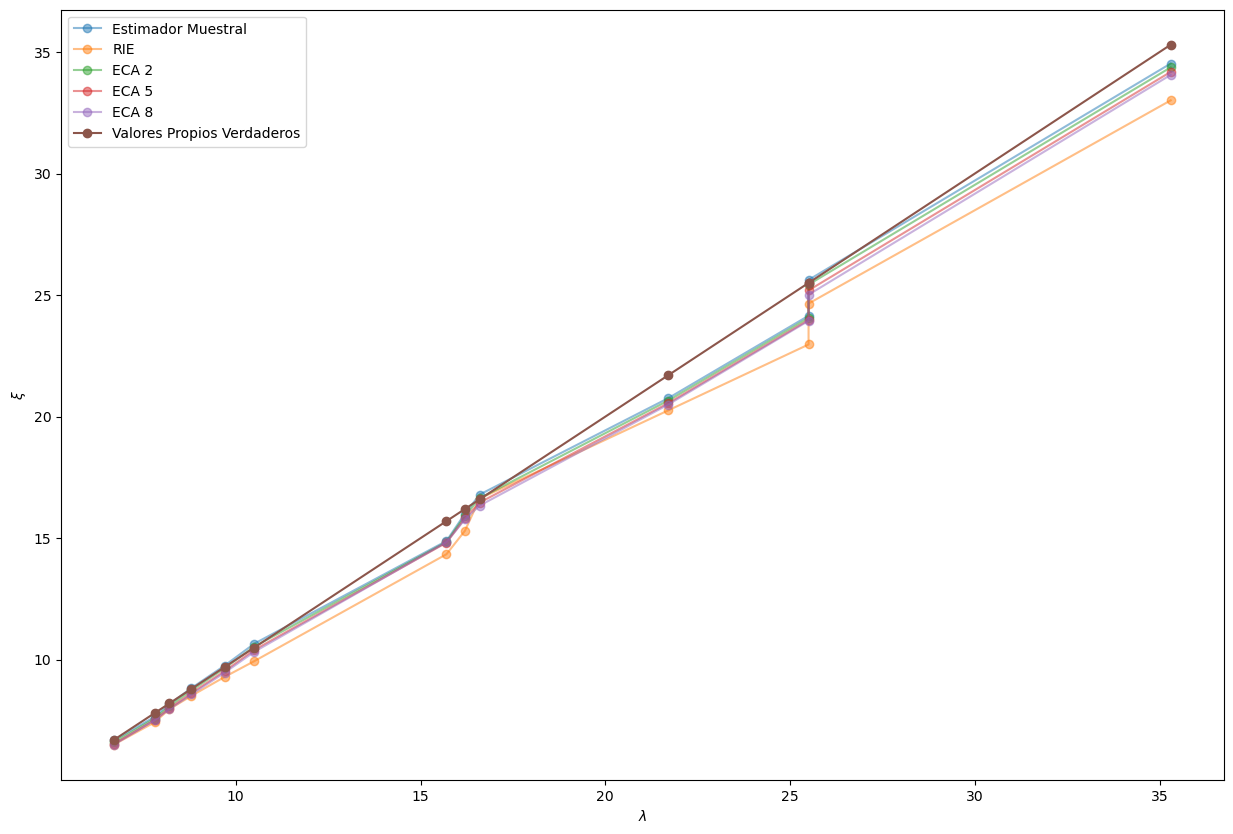

In [97]:
#plt.title("Comparación de los primeros 480 valores propios verdaderos vs valores propios RIE y valores propios muestrales (con estandarización")
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot( eigen_true[487:], means_vals_propios_muestral[487:], marker = 'o', alpha = 0.5)
ax.plot( eigen_true[487:], means_vals_propios_rie[487:],marker = 'o', alpha = 0.5)
ax.plot( eigen_true[487:], means_vals_propios_eca_2[487:], marker = 'o', alpha = 0.5)
ax.plot( eigen_true[487:], means_vals_propios_eca_5[487:], marker = 'o', alpha = 0.5)
ax.plot( eigen_true[487:], means_vals_propios_eca_8[487:], marker = 'o', alpha = 0.5)
ax.plot(eigen_true[487:], eigen_true[487:], marker = 'o')
plt.legend(labels=['Estimador Muestral', 'RIE', 'ECA 2', 'ECA 5', 'ECA 8','Valores Propios Verdaderos'])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()

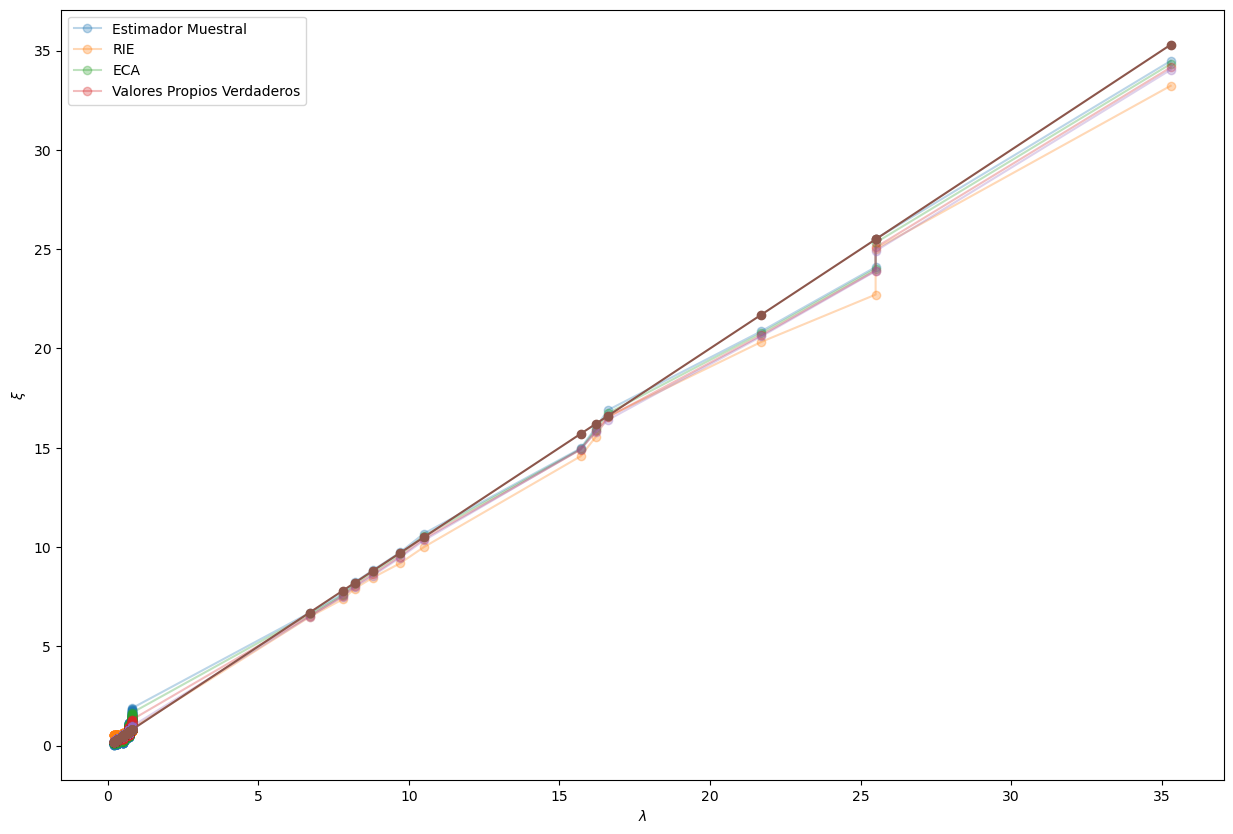

In [46]:
#plt.title("Comparación de todos valores propios verdaderos vs valores propios RIE y valores propios muestrales (con estandarización)")
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot( eigen_true, means_vals_propios_muestral, marker = 'o', alpha = 0.3)
ax.plot( eigen_true, means_vals_propios_rie, marker = 'o', alpha = 0.3)
ax.plot( eigen_true, means_vals_propios_eca_2, marker = 'o', alpha = 0.3)
ax.plot( eigen_true, means_vals_propios_eca_5, marker = 'o', alpha = 0.3)
ax.plot( eigen_true, means_vals_propios_eca_8, marker = 'o', alpha = 0.3)
ax.plot(eigen_true, eigen_true, marker = 'o')
plt.legend(labels=['Estimador Muestral', 'RIE', 'ECA','Valores Propios Verdaderos'])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()


### Simulación con q = 1/4 y con estandarización

In [69]:
corr_matrix =  make_corr_matrix([70, 50, 20, 35, 25, 40, 50, 50 , 20, 40, 50, 30, 20], [0.3, 0.5, 0.8, 0.2, 0.3, 0.2, 0.7, 0.5, 0.3, 0.4, 0.3, 0.3, 0.5])
num_obs = 2000
num_simul = 100

In [70]:
eigen_true = np.linalg.eigvalsh(corr_matrix)
eigen_true.sort()

In [71]:
def returnsStandardization(returns):
    returns_wth_mean = returns - np.mean(returns, axis=0)
    hat_sigma = np.sqrt((returns_wth_mean**2).sum(axis=1))
    r_tilde = returns_wth_mean.divide(hat_sigma, axis=0)
    X = r_tilde / np.std(r_tilde)
    return X

In [72]:
frob_muestral = []
frob_rie = []
frob_eca = []
vals_propios_muestral = []
vals_propios_rie = []
vals_propios_eca = []
for simul in range(num_simul):
    # Generación de retornos
    daily_returns = np.random.multivariate_normal(mean = np.zeros(corr_matrix.shape[0]), cov = corr_matrix, size=num_obs)
    # Estandarización de los retornos
    daily_returns_df = pd.DataFrame(daily_returns)
    daily_returns_df = returnsStandardization(daily_returns_df)
    # Estimador de correlación muestral
    est_corr = np.corrcoef(daily_returns_df.values.T)
    # Estimador RIE
    rie_corr = rie_estimator.get_rie(returns=daily_returns_df, normalize=False, max_ones= False)
    # Estimado ECA
    eca_corr = csestimator.get_shrinkage_est(X_matrix = daily_returns_df, alpha = 0.5)
    # Calcular distancias frobenius
    frob_muestral.append(np.linalg.norm(((corr_matrix - est_corr)), ord = "fro"))
    frob_rie.append(np.linalg.norm(((corr_matrix - rie_corr)), ord = "fro"))
    frob_eca.append(np.linalg.norm(((corr_matrix - eca_corr)), ord = "fro"))
    # Sacar valores propios
    eigen_sample = np.linalg.eigvalsh(est_corr)
    eigen_rie = np.linalg.eigvalsh(rie_corr)
    eigen_eca = np.linalg.eigvalsh(eca_corr)
    eigen_sample.sort()
    eigen_rie.sort()
    eigen_eca.sort()
    vals_propios_muestral.append(eigen_sample)
    vals_propios_rie.append(eigen_rie)
    vals_propios_eca.append(eigen_eca)

In [73]:
print(np.mean(frob_muestral))
print(np.mean(frob_rie))
print(np.mean(frob_eca))
print(np.mean(frob_muestral) - np.mean(frob_rie))
print(np.mean(frob_muestral) - np.mean(frob_eca))
print(np.std(frob_muestral))
print(np.std(frob_rie))
print(np.std(frob_eca))

11.20306828104028
9.860269709174906
6.509470578303853
1.3427985718653748
4.693597702736428
0.2090169598146506
0.4712290587819162
0.24846351352260249


In [74]:
vals_propios_muestral = np.array(vals_propios_muestral)
vals_propios_rie = np.array(vals_propios_rie)
vals_propios_eca = np.array(vals_propios_eca)
vals_propios_muestral.shape

(100, 500)

In [75]:
means_vals_propios_muestral = vals_propios_muestral.mean(axis = 0)
means_vals_propios_rie = vals_propios_rie.mean(axis = 0)
means_vals_propios_eca = vals_propios_eca.mean(axis = 0)
means_vals_propios_muestral.sort()
means_vals_propios_rie.sort()
means_vals_propios_eca.sort()

In [76]:
data2 = [means_vals_propios_muestral[eigen_true.round(2) == 0.2], means_vals_propios_eca[eigen_true.round(2) == 0.2], means_vals_propios_rie[eigen_true.round(2) == 0.2]]
data3 = [means_vals_propios_muestral[eigen_true.round(2) == 0.3], means_vals_propios_eca[eigen_true.round(2) == 0.3], means_vals_propios_rie[eigen_true.round(2) == 0.3]]
data5 = [means_vals_propios_muestral[eigen_true.round(2) == 0.5], means_vals_propios_eca[eigen_true.round(2) == 0.5], means_vals_propios_rie[eigen_true.round(2) == 0.5]]
data6 = [means_vals_propios_muestral[eigen_true.round(2) == 0.6], means_vals_propios_eca[eigen_true.round(2) == 0.6], means_vals_propios_rie[eigen_true.round(2) == 0.6]]
data7 = [means_vals_propios_muestral[eigen_true.round(2) == 0.7], means_vals_propios_eca[eigen_true.round(2) == 0.7], means_vals_propios_rie[eigen_true.round(2) == 0.7]]
data8 = [means_vals_propios_muestral[eigen_true.round(2) == 0.8], means_vals_propios_eca[eigen_true.round(2) == 0.8], means_vals_propios_rie[eigen_true.round(2) == 0.8]]

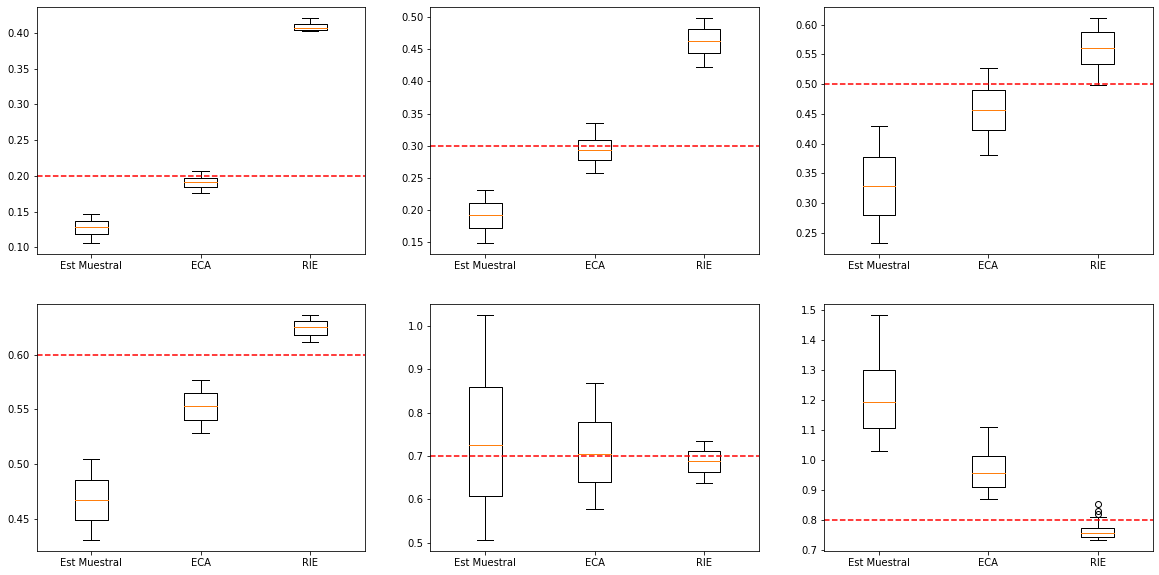

In [77]:
fig7, ax7 = plt.subplots(2,3, figsize=(20,10))
ax7[0,0].boxplot(data2, labels=["Est Muestral", "ECA", "RIE"])
ax7[0,0].axhline(y=0.2, color='r', linestyle='--')
ax7[0,1].boxplot(data3, labels=["Est Muestral", "ECA", "RIE"])
ax7[0,1].axhline(y=0.3, color='r', linestyle='--')
ax7[0,2].boxplot(data5, labels=["Est Muestral", "ECA", "RIE"])
ax7[0,2].axhline(y=0.5, color='r', linestyle='--')
ax7[1,0].boxplot(data6, labels=["Est Muestral", "ECA", "RIE"])
ax7[1,0].axhline(y=0.6, color='r', linestyle='--')
ax7[1,1].boxplot(data7, labels=["Est Muestral", "ECA", "RIE"])
ax7[1,1].axhline(y=0.7, color='r', linestyle='--')
ax7[1,2].boxplot(data8, labels=["Est Muestral", "ECA", "RIE"])
ax7[1,2].axhline(y=0.8, color='r', linestyle='--')

plt.show()

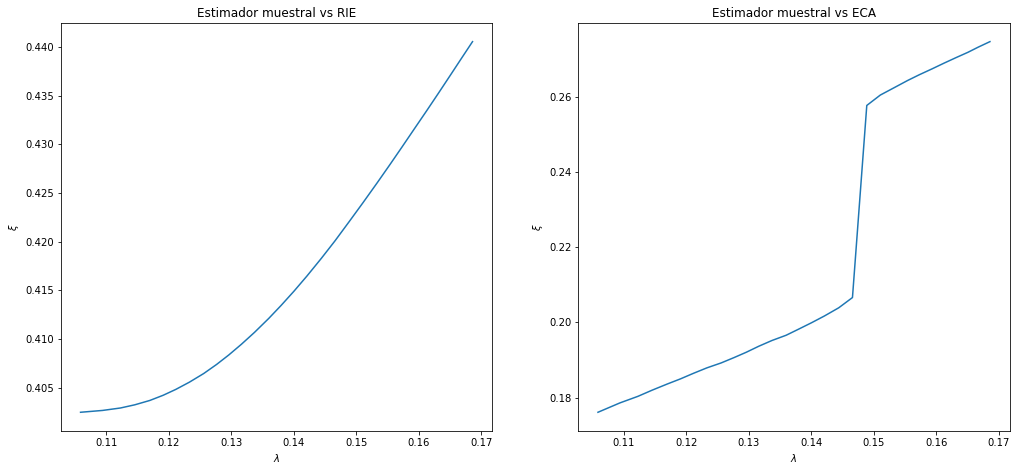

In [78]:
#plt.title(r"Comparación de los valores propios del RIE contra Estimador de Correlación Muestral con $q = 1$ y estandarización")
fig, ax = plt.subplots(1,2, figsize=(17,7.5))
ax[0].plot(means_vals_propios_muestral[:30],means_vals_propios_rie[:30])
ax[1].plot(means_vals_propios_muestral[:30],means_vals_propios_eca[:30])
ax[0].set(ylabel=r'$\xi$')
ax[0].set(xlabel=r'$\lambda$')
ax[0].set_title("Estimador muestral vs RIE")
ax[1].set_title("Estimador muestral vs ECA")
ax[1].set(ylabel=r'$\xi$')
ax[1].set(xlabel=r'$\lambda$')
plt.show()

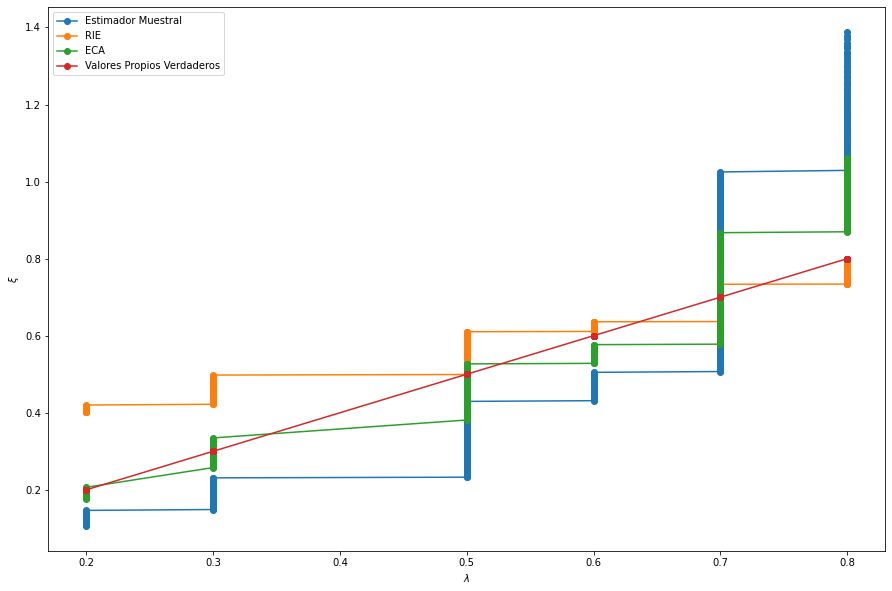

In [79]:
#plt.title("Comparación de los primeros 480 valores propios verdaderos vs valores propios RIE y valores propios muestrales (con estandarización")
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot( eigen_true[:480], means_vals_propios_muestral[:480], marker = 'o')
ax.plot( eigen_true[:480], means_vals_propios_rie[:480],marker = 'o')
ax.plot( eigen_true[:480], means_vals_propios_eca[:480], marker = 'o')
ax.plot(eigen_true[:480], eigen_true[:480], marker = 'o')
plt.legend(labels=['Estimador Muestral', 'RIE', 'ECA','Valores Propios Verdaderos'])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()

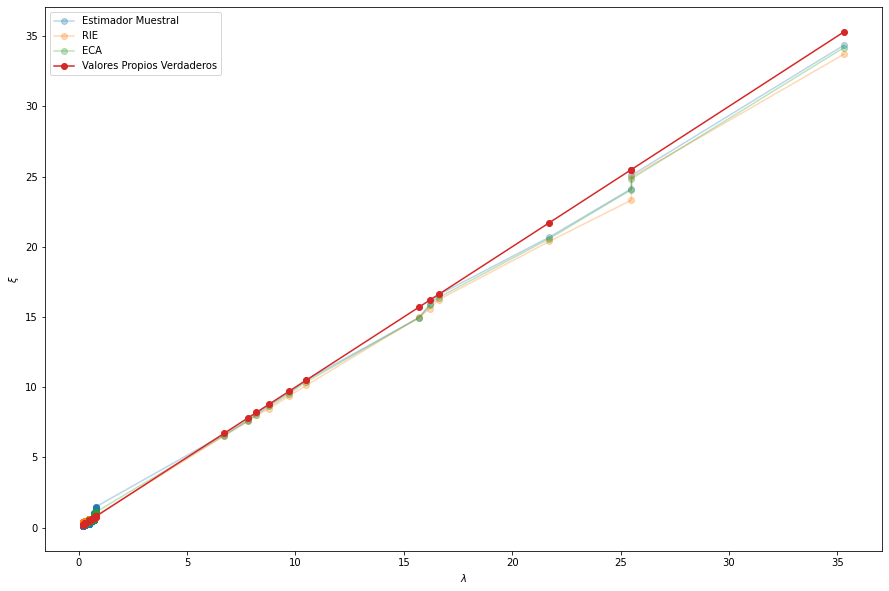

In [80]:
#plt.title("Comparación de todos valores propios verdaderos vs valores propios RIE y valores propios muestrales (con estandarización)")
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot( eigen_true, means_vals_propios_muestral, marker = 'o', alpha = 0.3)
ax.plot( eigen_true, means_vals_propios_rie, marker = 'o', alpha = 0.3)
ax.plot( eigen_true, means_vals_propios_eca, marker = 'o', alpha = 0.3)
ax.plot(eigen_true, eigen_true, marker = 'o')
plt.legend(labels=['Estimador Muestral', 'RIE', 'ECA','Valores Propios Verdaderos'])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()